In [ ]:
!pip install -q tacoreader rasterio matplotlib --upgrade

File '/kaggle/input/cloudsen12-l2a-file/cloudsen12-l2a.0000.part.taco' found. Proceeding with visualization.
Loading the local dataset with tacoreader...
Dataset loaded successfully. Contains 4645 samples.
Fetching random sample #325 for visualization...
Displaying the image and its cloud mask...


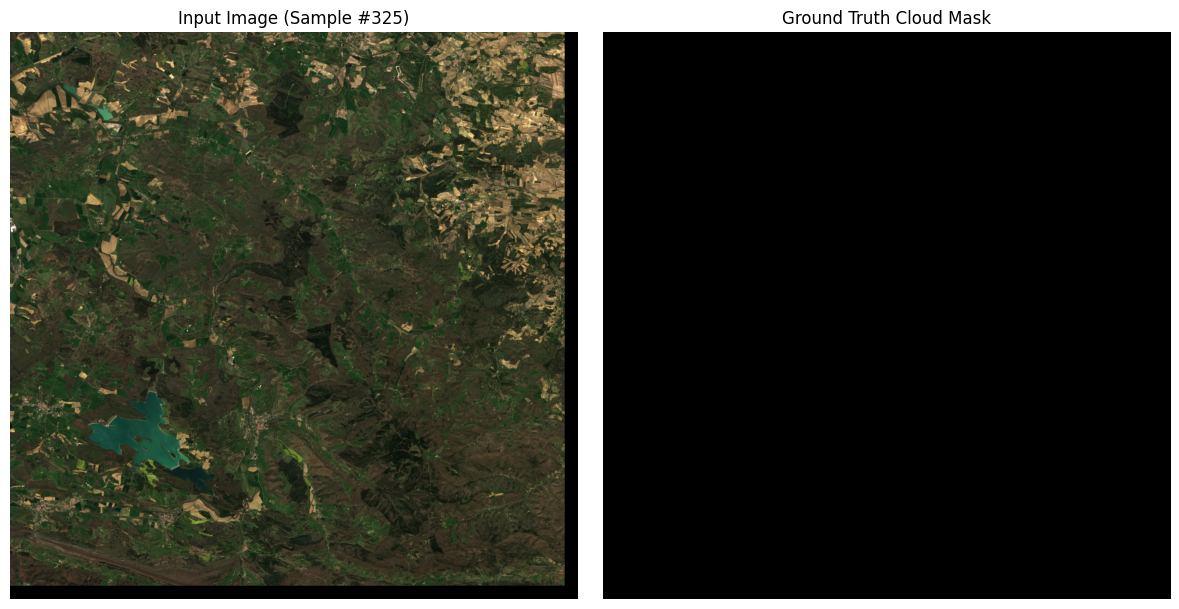

In [3]:
import os
import numpy as np
import tacoreader
import rasterio
import matplotlib.pyplot as plt

# --- Configuration ---
LOCAL_FILE_PATH = "/kaggle/input/cloudsen12-l2a-file/cloudsen12-l2a.0000.part.taco" 

# --- 1. Check if the Local File Exists ---
if not os.path.exists(LOCAL_FILE_PATH):
    print(f"ERROR: The file was not found at '{LOCAL_FILE_PATH}'")
    print("Please make sure the file is in your Kaggle working directory and the name is correct.")
else:
    print(f"File '{LOCAL_FILE_PATH}' found. Proceeding with visualization.")
    
    try:
        # --- 2. Load the Local Dataset ---
        print("Loading the local dataset with tacoreader...")
        local_dataset = tacoreader.load(LOCAL_FILE_PATH)
        print(f"Dataset loaded successfully. Contains {len(local_dataset)} samples.")

        # --- 3. Get a Random Sample ---
        random_idx = np.random.randint(0, len(local_dataset))
        print(f"Fetching random sample #{random_idx} for visualization...")
        
        sample = local_dataset.read(random_idx)
        s2_image_path = sample.read(0)  # Path to the multi-band image
        s2_label_path = sample.read(1) # Path to the label mask

        # --- 4. Read and Prepare Data for Visualization ---
        # Read the image data
        with rasterio.open(s2_image_path) as src:
            # For L2A data, the RGB bands (B04, B03, B02) are at indices 4, 3, 2
            image_data = src.read([4, 3, 2])
        
        # Read the mask data
        with rasterio.open(s2_label_path) as src:
            mask_data = src.read(1)

        # Transpose image for plotting: (C, H, W) -> (H, W, C)
        rgb_image = image_data.transpose(1, 2, 0)
        
        # Create a binary mask for clouds (labels 1=thick or 2=thin)
        binary_mask = np.where((mask_data == 1) | (mask_data == 2), 1, 0)
        
        # --- 5. Visualize the Sample ---
        print("Displaying the image and its cloud mask...")
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Display the RGB Image
        # We clip the reflectance values for better visual contrast
        axes[0].imshow(np.clip(rgb_image / 10000.0 * 3.5, 0, 1))
        axes[0].set_title(f"Input Image (Sample #{random_idx})")
        axes[0].axis('off')

        # Display the Binary Cloud Mask
        axes[1].imshow(binary_mask, cmap='gray')
        axes[1].set_title("Ground Truth Cloud Mask")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nAn error occurred during loading or visualization: {e}")



In [4]:
!pip install -q "segmentation-models-pytorch>=0.3.3" "albumentations>=1.3.1" "timm>=0.9.2" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 520.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

Using device: cuda
--- HYPER-SPEED CONFIGURATION ENABLED ---
Loading local dataset and creating dataloaders...
Train dataset size: 1700
Validation dataset size: 300
Initializing model...
--- Epoch 1/15 ---


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/tmp/ipykernel_36/1674048814.py:124: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 1.1567 | Val Loss: 0.9511 | Val IoU: 0.3508
Model saved with new best IoU: 0.3508
--- Epoch 2/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.8409 | Val Loss: 0.9220 | Val IoU: 0.3808
Model saved with new best IoU: 0.3808
--- Epoch 3/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.7583 | Val Loss: 0.8927 | Val IoU: 0.3702
--- Epoch 4/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.6847 | Val Loss: 1.1759 | Val IoU: 0.2751
--- Epoch 5/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.6897 | Val Loss: 0.8814 | Val IoU: 0.3718
--- Epoch 6/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.6094 | Val Loss: 1.0794 | Val IoU: 0.3207
--- Epoch 7/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.4978 | Val Loss: 1.0135 | Val IoU: 0.2847
--- Epoch 8/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.4929 | Val Loss: 1.0720 | Val IoU: 0.2789
--- Epoch 9/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.5450 | Val Loss: 1.0900 | Val IoU: 0.3036
--- Epoch 10/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.4191 | Val Loss: 0.9977 | Val IoU: 0.3098
--- Epoch 11/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.4063 | Val Loss: 1.0202 | Val IoU: 0.3224
--- Epoch 12/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.3884 | Val Loss: 0.9621 | Val IoU: 0.3631
--- Epoch 13/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.3466 | Val Loss: 1.0040 | Val IoU: 0.3439
--- Epoch 14/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.3459 | Val Loss: 1.0220 | Val IoU: 0.3534
--- Epoch 15/15 ---


/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Training:   0%|          | 0/54 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Validating:   0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_36/1674048814.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Ple

Train Loss: 0.3200 | Val Loss: 1.0517 | Val IoU: 0.3327

--- Training Finished ---


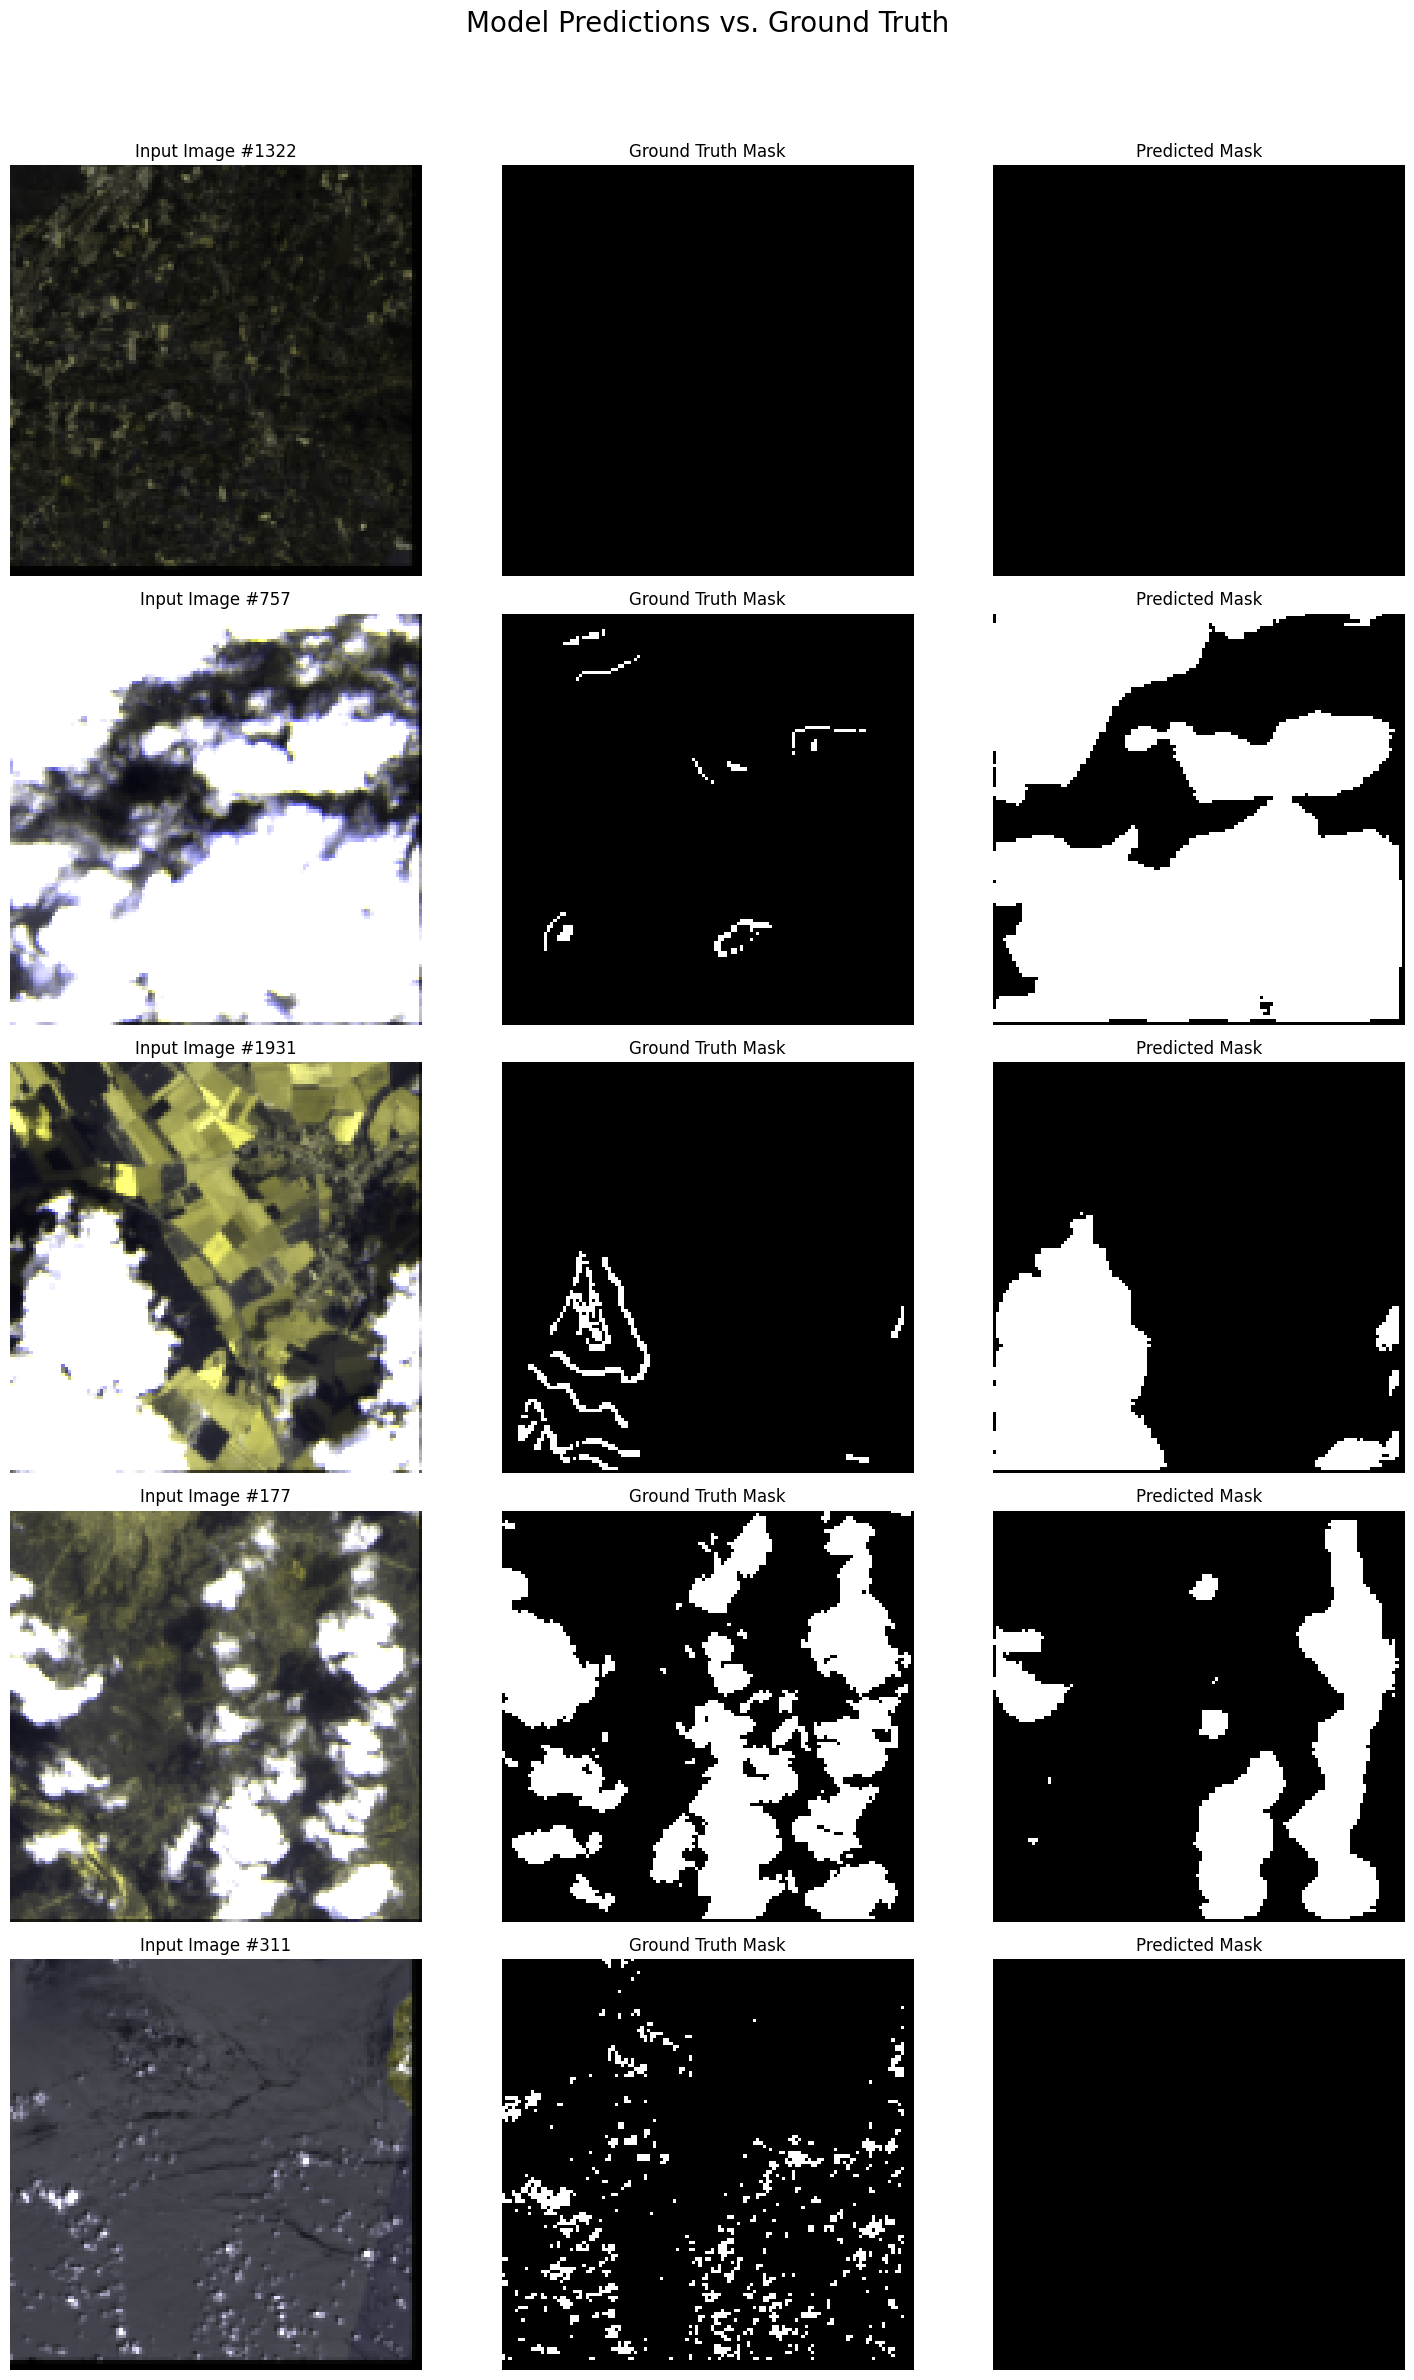

In [6]:
import os
import torch
import numpy as np
import tacoreader
import rasterio
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader, random_split, Subset
import segmentation_models_pytorch as smp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import GradScaler, autocast

# --- HYPER-SPEED CONFIGURATION ---
CONFIG = {
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    "BATCH_SIZE": 32,
    "NUM_WORKERS": 0, # Kept at 0 to prevent RasterioIOError
    "EPOCHS": 15,
    "LEARNING_RATE": 1e-3, 
    "WEIGHT_DECAY": 1e-2,
    "VALIDATION_SPLIT": 0.15,
    "NUM_SAMPLES_TO_USE": 2000, 
    "IMAGE_SIZE": 128, 
    "BANDS_TO_READ": [2, 4, 8, 11, 12], 
    "ENCODER": "timm-mobilenetv3_small_100",
    "LOCAL_FILE_PATH": "/kaggle/input/cloudsen12-l2a-file/cloudsen12-l2a.0000.part.taco",
}

print(f"Using device: {CONFIG['DEVICE']}")
print("--- HYPER-SPEED CONFIGURATION ENABLED ---")

# --- Custom PyTorch Dataset (with robust error handling) ---
class CloudDataset(Dataset):
    def __init__(self, taco_dataset, bands_to_read, image_size, augmentations=None):
        self.taco_dataset = taco_dataset
        self.bands_to_read = bands_to_read
        self.image_size = image_size
        self.augmentations = augmentations

    def __len__(self):
        return len(self.taco_dataset)

    def __getitem__(self, idx):
        while True:
            try:
                sample = self.taco_dataset.read(idx)
                s2_image_path = sample.read(0)
                s2_label_path = sample.read(1)

                with rasterio.open(s2_image_path) as src:
                    image = src.read(self.bands_to_read, out_shape=(self.image_size, self.image_size), resampling=rasterio.enums.Resampling.bilinear)
                image = image.transpose(1, 2, 0).astype(np.float32)

                with rasterio.open(s2_label_path) as src:
                    mask = src.read(1, out_shape=(self.image_size, self.image_size), resampling=rasterio.enums.Resampling.nearest)
                binary_mask = np.where((mask == 1) | (mask == 2), 1, 0).astype(np.float32)

                image /= 10000.0
                
                if self.augmentations:
                    augmented = self.augmentations(image=image, mask=binary_mask)
                    image = augmented['image']
                    mask = augmented['mask']
                
                if mask.ndim == 2:
                    mask = mask.unsqueeze(0)
                
                return image, mask

            except rasterio.errors.RasterioIOError as e:
                print(f"\nWARNING: Skipping sample {idx} due to a RasterioIOError: {e}. Retrying with a new random sample.")
                idx = np.random.randint(0, len(self) - 1)

# --- Augmentations ---
train_augs = A.Compose([A.HorizontalFlip(p=0.5), A.VerticalFlip(p=0.5), ToTensorV2()])
val_augs = A.Compose([ToTensorV2()])

# --- Datasets and DataLoaders ---
print("Loading local dataset and creating dataloaders...")
if not os.path.exists(CONFIG["LOCAL_FILE_PATH"]):
    raise FileNotFoundError(f"The specified local file was not found: {CONFIG['LOCAL_FILE_PATH']}")

local_taco_dataset = tacoreader.load(CONFIG["LOCAL_FILE_PATH"])
_full_dataset_with_augs = CloudDataset(local_taco_dataset, CONFIG['BANDS_TO_READ'], CONFIG['IMAGE_SIZE'], train_augs)

indices = np.random.choice(range(len(_full_dataset_with_augs)), CONFIG["NUM_SAMPLES_TO_USE"], replace=False)
working_dataset = Subset(_full_dataset_with_augs, indices)

val_size = int(CONFIG['VALIDATION_SPLIT'] * len(working_dataset))
train_size = len(working_dataset) - val_size
train_dataset, val_dataset = random_split(working_dataset, [train_size, val_size])

val_dataset.dataset.dataset.augmentations = val_augs

train_loader = DataLoader(train_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=True, num_workers=CONFIG['NUM_WORKERS'])
val_loader = DataLoader(val_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=False, num_workers=CONFIG['NUM_WORKERS'])

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

# --- Loss Function ---
class DiceBCELoss(nn.Module):
    def forward(self, inputs, targets, smooth=1):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets)
        inputs_prob = torch.sigmoid(inputs).view(-1)
        targets = targets.view(-1)
        intersection = (inputs_prob * targets).sum()
        dice_loss = 1 - (2. * intersection + smooth) / (inputs_prob.sum() + targets.sum() + smooth)
        return bce_loss + dice_loss

# --- Model, Loss, and Optimizer ---
print("Initializing model...")
model = smp.Unet(CONFIG['ENCODER'], encoder_weights="imagenet", in_channels=len(CONFIG['BANDS_TO_READ']), classes=1, activation=None)
model.to(CONFIG['DEVICE'])
loss_fn = DiceBCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['LEARNING_RATE'], weight_decay=CONFIG['WEIGHT_DECAY'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)
scaler = GradScaler()

# --- Training Loop ---
best_val_iou = 0.0
for epoch in range(CONFIG['EPOCHS']):
    print(f"--- Epoch {epoch+1}/{CONFIG['EPOCHS']} ---")
    model.train()
    train_loss = 0.0
    for images, masks in tqdm(train_loader, desc="Training"):
        images, masks = images.to(CONFIG['DEVICE']), masks.to(CONFIG['DEVICE'])
        
        # FIX: Use the older, more compatible autocast API
        with autocast():
            outputs = model(images)
            loss = loss_fn(outputs, masks)
            
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    
    model.eval()
    val_loss, total_iou = 0.0, 0.0
    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc="Validating"):
            images, masks = images.to(CONFIG['DEVICE']), masks.to(CONFIG['DEVICE'])
            
            # FIX: Use the older, more compatible autocast API
            with autocast():
                outputs = model(images)
                loss = loss_fn(outputs, masks)

            val_loss += loss.item()
            preds = torch.sigmoid(outputs) > 0.5
            tp, fp, fn, tn = smp.metrics.get_stats(preds.long(), masks.long(), mode='binary')
            total_iou += smp.metrics.iou_score(tp, fp, fn, tn, reduction='micro').item()
            
    avg_val_loss = val_loss / len(val_loader)
    avg_iou = total_iou / len(val_loader)
    scheduler.step(avg_val_loss)
    
    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val IoU: {avg_iou:.4f}")
    
    if avg_iou > best_val_iou:
        best_val_iou = avg_iou
        torch.save(model.state_dict(), 'best_cloud_model.pth')
        print(f"Model saved with new best IoU: {best_val_iou:.4f}")

print("\n--- Training Finished ---")

# --- Visualization ---
def visualize_predictions(dataset, model, num_samples=5):
    if not os.path.exists('best_cloud_model.pth'): return
    model.load_state_dict(torch.load('best_cloud_model.pth'))
    model.to(CONFIG['DEVICE']).eval()
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))
    fig.suptitle("Model Predictions vs. Ground Truth", fontsize=20)
    
    for i in range(num_samples):
        idx = np.random.randint(0, len(dataset))
        image, mask = dataset[idx]
        with torch.no_grad():
            pred_mask = (torch.sigmoid(model(image.unsqueeze(0).to(CONFIG['DEVICE']))) > 0.5).float().cpu().squeeze(0)
        
        # Our loaded bands are [B02, B04, B08, B11, B12]
        # For visualization: Red=B04 (idx 1), Green=B04 (idx 1), Blue=B02 (idx 0)
        img_vis = image.numpy()[[1, 1, 0], :, :].transpose(1, 2, 0)
        img_vis = np.clip(img_vis, 0, 0.3) / 0.3
        
        axes[i, 0].imshow(img_vis)
        axes[i, 0].set_title(f"Input Image #{dataset.indices[idx]}")
        axes[i, 0].axis('off')
        axes[i, 1].imshow(mask.squeeze(), cmap='gray')
        axes[i, 1].set_title("Ground Truth Mask")
        axes[i, 1].axis('off')
        axes[i, 2].imshow(pred_mask.squeeze(), cmap='gray')
        axes[i, 2].set_title("Predicted Mask")
        axes[i, 2].axis('off')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

visualize_predictions(val_dataset, model)
